In [64]:
import qutip as qt
import numpy as np
import os, sys
import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from lfig import LatexFigure

sys.path.append("/home/bf16951/QMD")
import qmla

%matplotlib inline


zero = np.array([1,0])
one = np.array([0,1])

paulis = {
    'y' : np.array([
        [0,-1j], 
        [1j, 0]
    ]),
    'z' : np.array([
        [1,0], 
        [0,-1]
    ]),
    'x' : np.array([
        [0,1], 
        [1,0]
    ])
}

In [65]:
s = zero
qs = qt.Qobj(s)


In [66]:
sq2 = 1/np.sqrt(2)
states = {
    'zero' : {
        'vec' : np.array([1,0]), 
        'name' : r"$| 0 \rangle$",
    }, 
    'one' : {
        'vec' : np.array([0,1]), 
        'name' : r"$| 1 \rangle$",
    }, 
    'plus' : {
        'vec' : np.array([sq2, sq2]), 
        'name' : r"$| + \rangle$",
    }, 
    'minus' : {
        'vec' : np.array([sq2, - sq2]), 
        'name' : r"$| - \rangle$",
    }, 
    'plus_i' : {
        'vec' : np.array([sq2, 1j*sq2]), 
        'name' : r"$| i \rangle$",
    }, 
    'minus_i' : {
        'vec' : np.array([sq2, -1j* sq2]), 
        'name' : r"$| -i \rangle$",
    }, 

}

In [67]:
def plot_state(states, name, save_file=None):
    
    fig, ax = plt.subplots(
        figsize=(2, 2), 
        subplot_kw=dict(projection='3d')
    )
    ax.axis('square') # to get a nice circular plot

    bloch = qt.Bloch(
        fig = fig, 
        axes = ax
    )
    bloch.vector_color = ['blue', 'green']
    bloch.vector_width = 2
    bloch.xlabel = [r"$ \left|+\right>$", r"$ \left|-\right>$"]
    bloch.ylabel = [r"$ \left|i\right>$", r"$ \left|-i\right>$"]
    bloch.xlpos = [1.4, -1.1]
    bloch.ylpos = [1.3, -1.4]
    bloch.zlpos = [1.2, -1.4]
    bloch.font_size = 10
    
    qstates = [qt.Qobj(s) for s in states]
    bloch.add_states(qstates)

    bloch.render(fig=fig, axes=ax) # render to the correct subplot 
    ax.annotate(
        name, 
        xy=(0.2, 0.9), 
        xytext=(0.85, 0.85), 
        xycoords='axes fraction',
        fontsize=30, 
        fontweight='bold',
        color='black', 
        ha='center',
    )
    if save_file is not None: 
        fig.savefig(save_file)
    

In [68]:
z_states = [ np.array([1,0]), np.array([0,1])]
x_states = [ np.array([sq2, sq2]), np.array([sq2, -1*sq2])]
y_states = [ np.array([sq2, 1j*sq2]), np.array([sq2, -1j*sq2])]

save_path = os.path.join(
    "..", "contextual_review", "figures"
)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


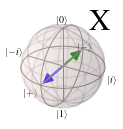

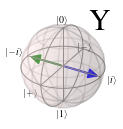

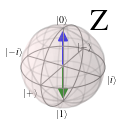

In [69]:
plot_state(x_states, name="X", save_file = os.path.join(save_path, "bloch_x_axis.pdf"))
plot_state(y_states, name="Y", save_file = os.path.join(save_path, "bloch_y_axis.pdf"))
plot_state(z_states, name="Z", save_file = os.path.join(save_path, "bloch_z_axis.pdf"))

In [70]:
def rotate_x(theta):
    
    return np.array([
        [np.cos(theta/2), 1j*np.sin(theta/2)], 
        [-1j*np.sin(theta/2), np.cos(theta/2)]
    ])

def rotate_y(theta):
    
    return np.array([
        [np.cos(theta/2), -1*np.sin(theta/2)], 
        [np.sin(theta/2), np.cos(theta/2)]
    ])

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


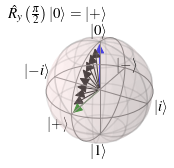

In [71]:
intermediate_states = []
for t in np.linspace(0, np.pi/2, 10):
    rotation = rotate_y(t)
    a = np.dot(rotation, states['zero']['vec'])
    
    intermediate_states.append(a)

vec_colours = ['k' for s in intermediate_states]
vec_colours[0] = 'blue'
vec_colours[-1] = 'green'

fig, ax = plt.subplots(
    figsize=(2.5, 2.5), 
    subplot_kw=dict(projection='3d')
)
ax.axis('square') # to get a nice circular plot

b = qt.Bloch(
    fig = fig, 
    axes = ax
)

b.vector_color = vec_colours
b.vector_width = 1
b.xlabel = [r"$ \left|+\right>$", r"$ \left|-\right>$"]
b.ylabel = [r"$ \left|i\right>$", r"$ \left|-i\right>$"]
b.xlpos = [1.4, -1.1]
b.ylpos = [1.3, -1.4]
b.zlpos = [1.2, -1.4]
b.font_size = 15

q_intermediate_states = [qt.Qobj(s) for s in intermediate_states]
b.add_states(q_intermediate_states)

b.render(fig=fig, axes=ax) # render to the correct subplot 
note = r"$\hat{R}_y\left(\frac{\pi}{2}\right) \left| 0 \right> = \left| + \right>$"
ax.annotate(
    note, 
    xy=(0.2, 0.9), 
    xytext=(0.2, 1.0), 
    xycoords='axes fraction',
    fontsize=15, 
    fontweight='normal',
    color='black', 
    ha='center',
)
plt.tight_layout()
fig.savefig(
    os.path.join(save_path, "bloch_rotate_y.pdf"),
)

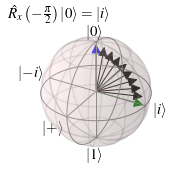

In [72]:
intermediate_states = []
for t in np.linspace(0, -np.pi/2, 10):
    rotation = rotate_x(t)
    a = np.dot(rotation, states['zero']['vec'])
    
    intermediate_states.append(a)

vec_colours = ['k' for s in intermediate_states]
vec_colours[0] = 'blue'
vec_colours[-1] = 'green'

fig, ax = plt.subplots(
    figsize=(2.5, 2.5), 
    subplot_kw=dict(projection='3d')
)
ax.axis('square') # to get a nice circular plot

b = qt.Bloch(
    fig = fig, 
    axes = ax
)

b.vector_color = vec_colours
b.vector_width = 1
b.xlabel = [r"$ \left|+\right>$", ""]
b.ylabel = [r"$ \left|i\right>$", r"$ \left|-i\right>$"]
b.xlpos = [1.4, -1.1]
b.ylpos = [1.3, -1.4]
b.zlpos = [1.2, -1.4]
b.font_size = 15

q_intermediate_states = [qt.Qobj(s) for s in intermediate_states]
b.add_states(q_intermediate_states)

b.render(fig=fig, axes=ax) # render to the correct subplot 
note = r"$\hat{R}_x\left(-\frac{\pi}{2}\right) \left| 0 \right> = \left| i \right>$"
ax.annotate(
    note, 
    xy=(0.2, 0.9), 
    xytext=(0.25, 1.0), 
    xycoords='axes fraction',
    fontsize=15, 
    fontweight='normal',
    color='black', 
    ha='center',
)
plt.tight_layout()
fig.savefig(
    os.path.join(save_path, "bloch_rotate_x.pdf"),
)

# Expectattion values

In [39]:
def get_state(beta):
    alpha = np.sqrt(1 - beta**2)
    
    state = np.array([alpha, beta])
    return alpha, state

def expectation_value_z(state):
    Zy = np.dot(paulis['z'], state)
    yZy = np.dot(state.conj().T, Zy)
    return yZy

def expectation_value_x(state):
    Zy = np.dot(paulis['x'], state)
    yZy = np.dot(state.conj().T, Zy)
    return yZy

def expectation_value_y(state):
    Zy = np.dot(paulis['y'], state)
    yZy = np.dot(state.conj().T, Zy)
    return yZy

In [96]:
betas = np.linspace(-1,1,201)
states = [ get_state(b) for b in betas]

In [99]:
alphas = [s[0] for s in states]
vectors = [s[1] for s in states]

In [100]:
exp_vals_x = [expectation_value_x(s) for s in vectors]
exp_vals_y = [expectation_value_y(s) for s in vectors]
exp_vals_z = [expectation_value_z(s) for s in vectors]

In [101]:
import lfig

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


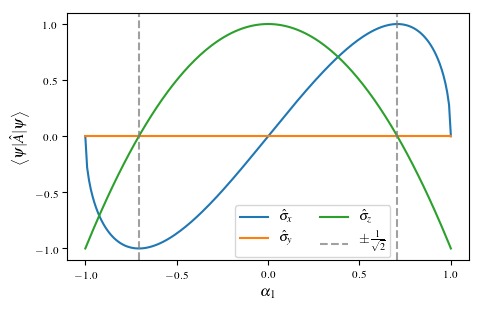

In [103]:
lf = lfig.LatexFigure(fraction=0.75, auto_label=False)
ax = lf.new_axis()

ax.plot(betas, exp_vals_x, label=r"$\hat{\sigma}_x$")
ax.plot(betas, exp_vals_y, label=r"$\hat{\sigma}_y$")
ax.plot(betas, exp_vals_z, label=r"$\hat{\sigma}_z$")

ax.set_ylabel(
    r"$ \left< \psi | \hat{A} | \psi \right>$"
)
ax.set_xlabel(r"$\alpha_1$")
ax.set_yticks([-1, -0.5, 0, 0.5,  1])
ax.set_xticks([-1, -0.5,  0, 0.5,  1])
ax.axvline(1/np.sqrt(2), ls='--', c='grey', alpha=0.75, label=r"$\pm \frac{1}{\sqrt{2}}$")
ax.axvline(-1/np.sqrt(2), ls='--', c='grey', alpha=0.75, )
ax.legend(
    ncol=2,
#     loc = 'lower center'
    bbox_to_anchor = (0.4, 0.25)
)

In [104]:
lf.save(
    os.path.join(save_path, "expectation_values.pdf")

)